In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn import tree


In [ ]:
csv_file_name = "uk/Accident_Information.csv"

In [ ]:
df = pd.read_csv( csv_file_name )
print(df.head(25).to_string())

C:\Users\User\AppData\Local\Temp\ipykernel_12024\1548708241.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv( csv_file_name )


   Accident_Index 1st_Road_Class  1st_Road_Number 2nd_Road_Class  2nd_Road_Number Accident_Severity Carriageway_Hazards        Date Day_of_Week  Did_Police_Officer_Attend_Scene_of_Accident              Junction_Control                      Junction_Detail   Latitude             Light_Conditions Local_Authority_(District) Local_Authority_(Highway)  Location_Easting_OSGR  Location_Northing_OSGR  Longitude LSOA_of_Accident_Location  Number_of_Casualties  Number_of_Vehicles  Pedestrian_Crossing-Human_Control  Pedestrian_Crossing-Physical_Facilities         Police_Force Road_Surface_Conditions           Road_Type Special_Conditions_at_Site  Speed_limit   Time Urban_or_Rural_Area     Weather_Conditions  Year InScotland
0   200501BS00001              A           3218.0            NaN              0.0           Serious                 NaN  2005-01-04     Tuesday                                          1.0  Data missing or out of range  Not at junction or within 20 metres  51.489096           

In [ ]:
target_column_name = "Accident_Severity"

In [ ]:
categorical_target_column = True
#categorical_target_column = False

In [ ]:
#Find out number of rows and columns
print(f'Total Number of Rows : {df.shape[0]}')
print(f'Total Number of Columns : {df.shape[1]}')

Total Number of Rows : 2047256
Total Number of Columns : 34


In [ ]:
if categorical_target_column :
  print( df[target_column_name].value_counts() )

Accident_Severity
Slight     1734548
Serious     286339
Fatal        26369
Name: count, dtype: int64


OBSERVATION

---

There are total 2,047,256 data points in this dataset. Among which 1,734,548 data points belong to class "Slight", 286,339 data points belong to class "Serious" and other 26,369 data points belong to class "Fatal".
This indicates that in the dataset the data points are not equally distributed among the classes.

Text(0.5, 1.0, 'Total Number of Null values for Each Column')

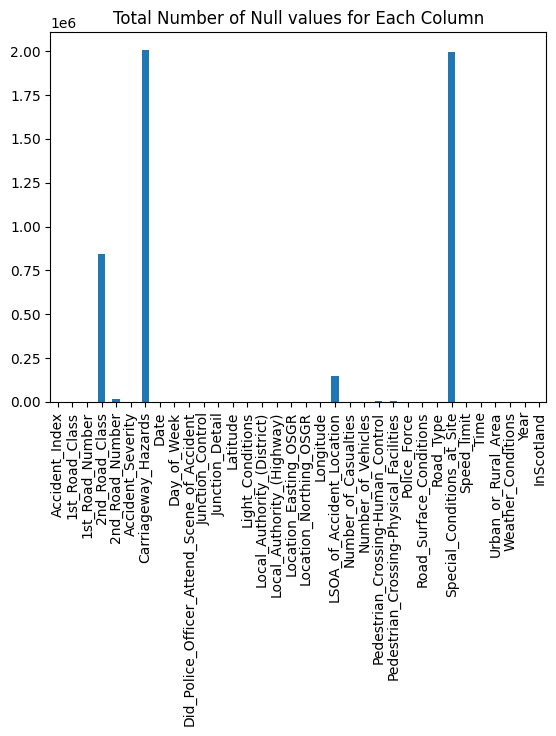

In [ ]:
df.isnull().sum().plot(kind='bar')
plt.title("Total Number of Null values for Each Column")


In [ ]:
#Find out the percentages of null value cout for each column
( df.isnull().sum()/len(df) ) *100


Accident_Index                                  0.000000
1st_Road_Class                                  0.000000
1st_Road_Number                                 0.000098
2nd_Road_Class                                 41.239200
2nd_Road_Number                                 0.859345
Accident_Severity                               0.000000
Carriageway_Hazards                            98.073079
Date                                            0.000000
Day_of_Week                                     0.000000
Did_Police_Officer_Attend_Scene_of_Accident     0.013579
Junction_Control                                0.000000
Junction_Detail                                 0.000000
Latitude                                        0.008499
Light_Conditions                                0.000000
Local_Authority_(District)                      0.000000
Local_Authority_(Highway)                       0.000000
Location_Easting_OSGR                           0.008011
Location_Northing_OSGR         

OBSERVATION

---


Most of the data points from the column "2nd_Road_Class", "Carriageway_Hazards", "Special_Conditions_at_Site" are missing. These column cannot be taken in consideration for further analysis.

In [ ]:
column_names = df.columns.tolist()
accepted_columns = ["Accident_Severity", "Day_of_Week", "Light_Conditions", "Number_of_Casualties", "Number_of_Vehicles", "Road_Surface_Conditions", "Road_Type", "Speed_limit", "Urban_or_Rural_Area", "Weather_Conditions", "Year"]

droped_column_names = [item for item in column_names if item not in accepted_columns]


df.drop( droped_column_names , axis = 1 ,inplace = True)

In [ ]:
# If total number of missing value is less than 5% then drop it otherwise fill using backward fill/forward fill.

print(f'Maximum Null values in column (Before Handling)  : { df.isnull().sum().max() }')

if (df.isnull().sum().max() > len(df) ) * 0.05:
  print("\n------Dropped Null Values-------\n")
  df.dropna( inplace = True)
else:
  print("\n------Replaced Null Values-------\n")
  df.fillna( method = 'bfill' , inplace = True) # You can use 'ffill' to forward fill


print(f'Maximum Null values in column (After Handling)  : { df.isnull().sum().max() }')



Maximum Null values in column (Before Handling)  : 37

------Replaced Null Values-------



C:\Users\User\AppData\Local\Temp\ipykernel_12024\351465153.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna( method = 'bfill' , inplace = True) # You can use 'ffill' to forward fill


Maximum Null values in column (After Handling)  : 0


In [ ]:
#Duplicate entry count
df.duplicated().value_counts()

print( ( df.duplicated().value_counts()/len(df) ) * 100)

True     84.602414
False    15.397586
Name: count, dtype: float64


OBSERVATION

---
There are 15% duplicate entries in this data set


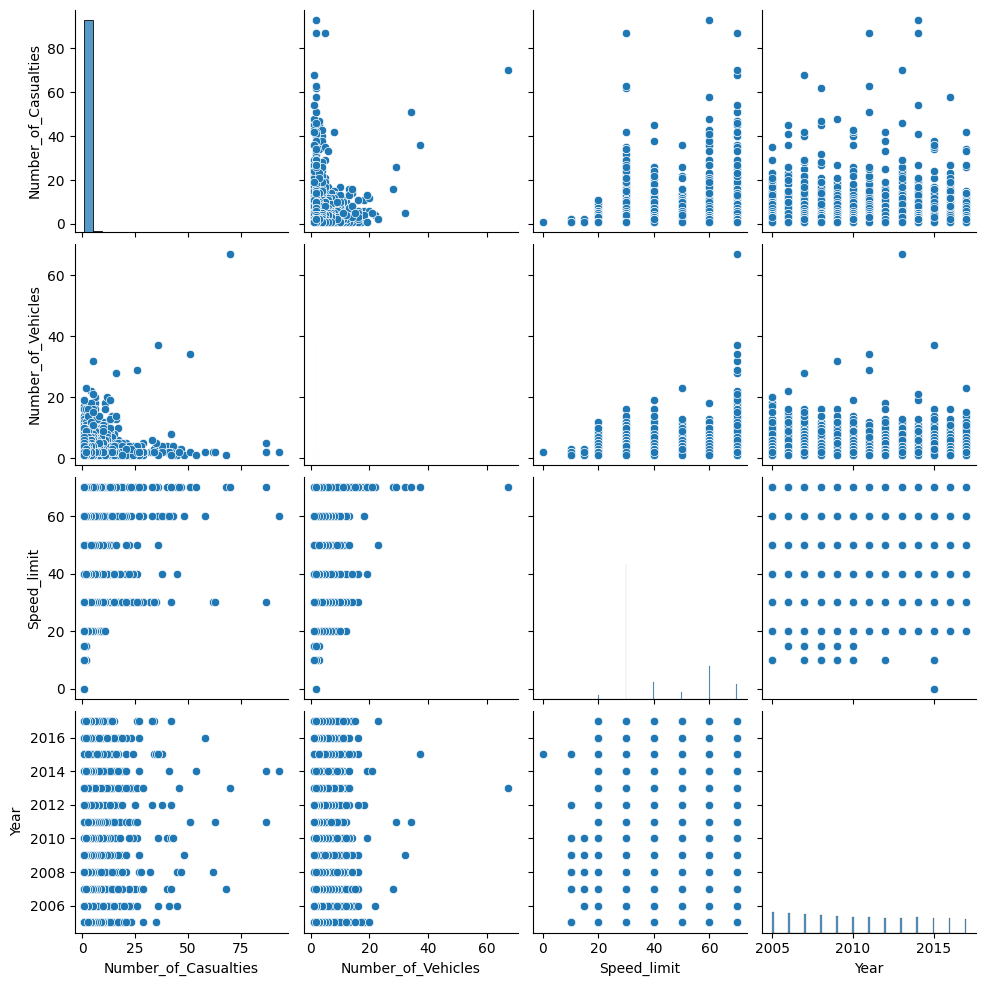

In [ ]:
#Pair Plot Gives you an overall insight on how the data's are distributed
sns.pairplot( df )

OBSERVATION

---
From the pair plot above some of the observations are :-   

1.    **Number of Casualties** : From the histogram analysis it can be observed that the number of casualties has a direct correlation with number of vehicles and speed limit. Number_of_Casualties vs Number_of_Vehicles graph has right skewed distribution meaning high casualty happens with low vehicle involvement. High casualty has high number of casualty, but there 30 speed limit has high casualty too. It seems number of casualty is consistent by years.

2.   **Number of Vehicles** : Number of vehicles involved in road accident increases as the speed limit increases.



In [ ]:
df.info()

print("\n\n-----------------Unique Values per column--------------------------------\n\n")

df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2047256 entries, 0 to 2047255
Data columns (total 11 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Accident_Severity        object 
 1   Day_of_Week              object 
 2   Light_Conditions         object 
 3   Number_of_Casualties     int64  
 4   Number_of_Vehicles       int64  
 5   Road_Surface_Conditions  object 
 6   Road_Type                object 
 7   Speed_limit              float64
 8   Urban_or_Rural_Area      object 
 9   Weather_Conditions       object 
 10  Year                     int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 171.8+ MB


-----------------Unique Values per column--------------------------------




Accident_Severity           3
Day_of_Week                 7
Light_Conditions            6
Number_of_Casualties       52
Number_of_Vehicles         29
Road_Surface_Conditions     6
Road_Type                   7
Speed_limit                 9
Urban_or_Rural_Area         3
Weather_Conditions         10
Year                       13
dtype: int64

In [ ]:
categorical_columns = ["Accident_Severity" , "Day_of_Week" , "Light_Conditions" ,"Road_Surface_Conditions" ,"Road_Type" , "Urban_or_Rural_Area", "Weather_Conditions", "Year"]
numeric_columns = [ "Number_of_Casualties" , "Number_of_Vehicles", "Speed_limit"]

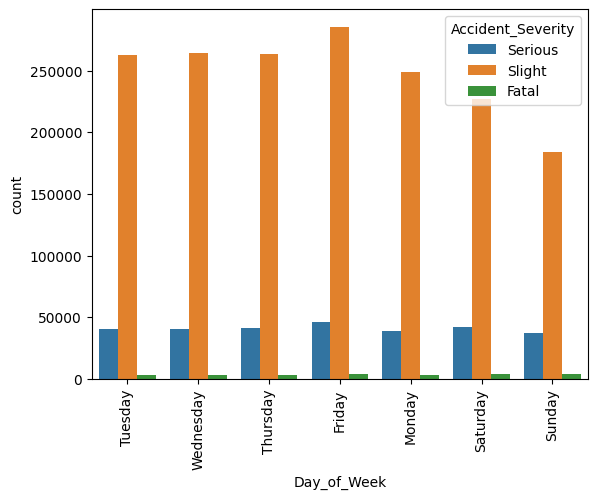

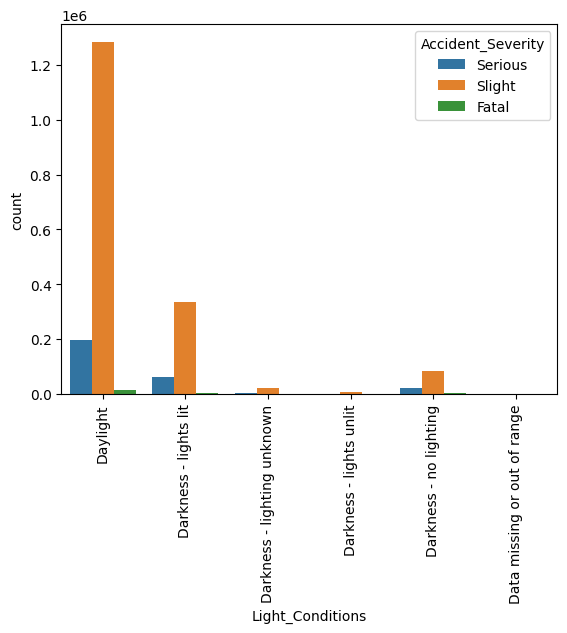

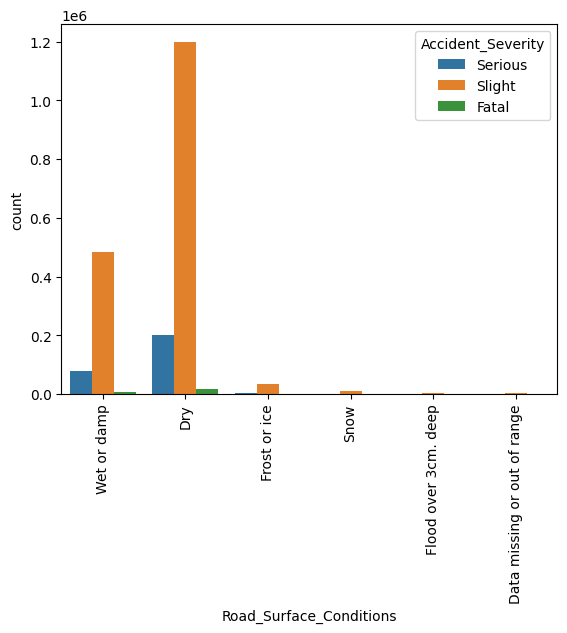

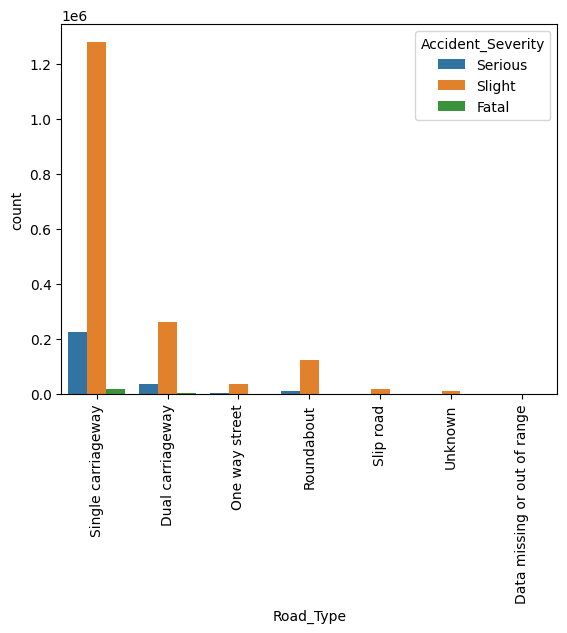

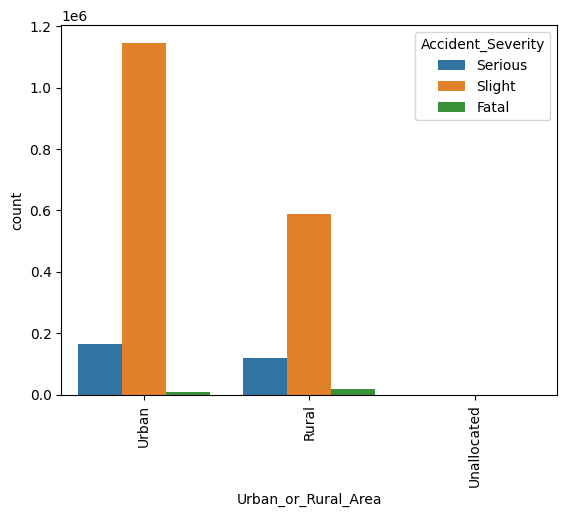

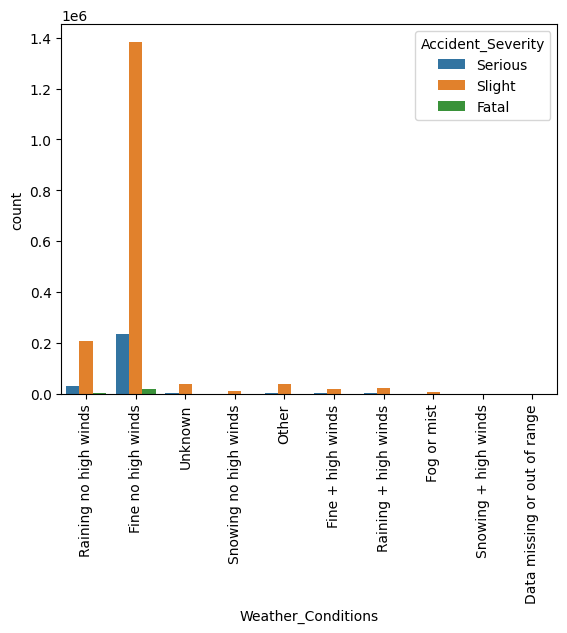

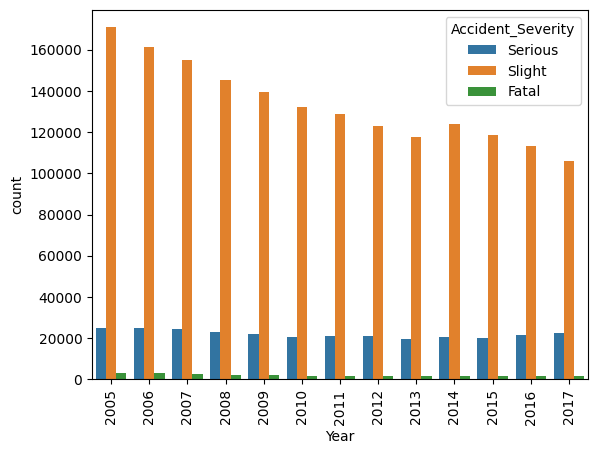

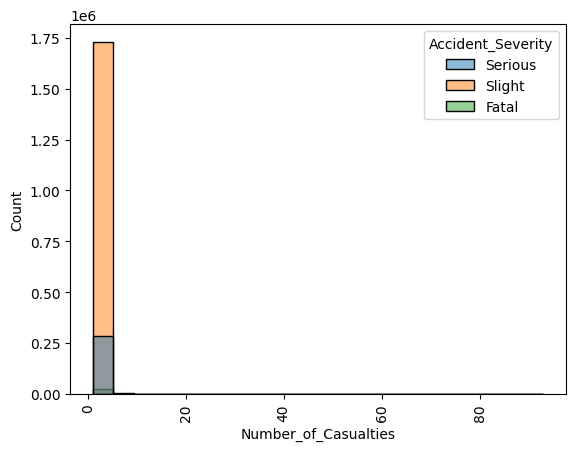

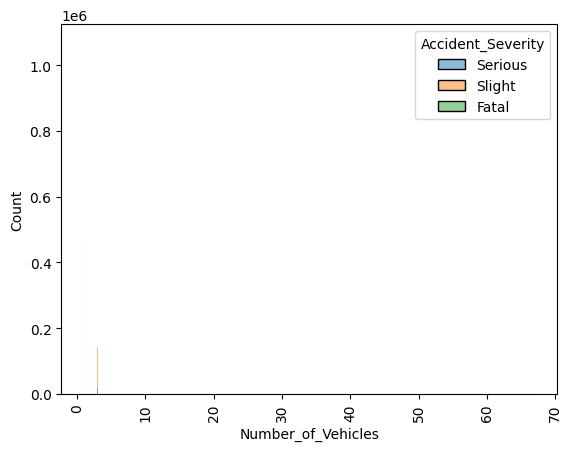

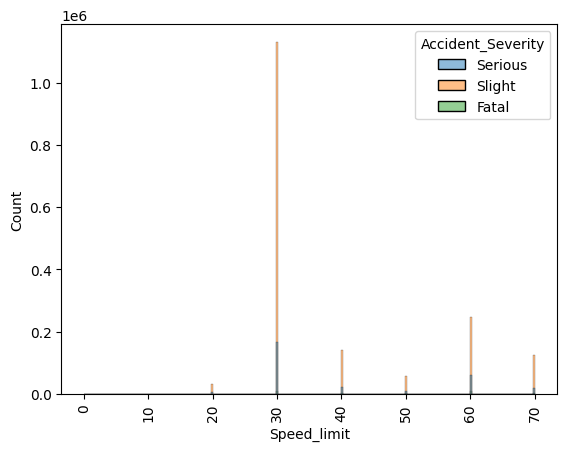

In [ ]:
if categorical_target_column:
  for column in categorical_columns:
    if column != target_column_name:
      #sns.barplot(x=column, y='Counts', hue= target_column_name, data= df.groupby([column, target_column_name]).size().reset_index(name="Counts"))
      sns.countplot( x = column , hue = target_column_name , data = df )
      plt.xticks(rotation=90)
      plt.show()

  for column in numeric_columns:
    if column != target_column_name:
      sns.histplot( x = column , hue = target_column_name , data = df)
      plt.xticks(rotation=90)
      plt.show()

else:
  for column in categorical_columns:
      if column != target_column_name:
        sns.histplot( x = target_column_name , hue = column , data = df)
        plt.xticks(rotation=90)
        plt.show()

  for column in numeric_columns:
    if column != target_column_name:
      sns.scatterplot( x = target_column_name , y = column , data = df)
      plt.xticks(rotation=90)
      plt.show()



OBSERVATION

---


1.   **Day of Week**: From the count plot it can be observed that slight and serious accidents are amazingly high in Fridays. In Sunday, Slight accident is low but serious accident is same as other days. It seems fatal accidents doesn't change based on week days.

2.  **Light Conditions** : Analysis reveals that most accidents mainly slight accidents happens in day light and in darkness but light lit condition.

3. **Road Conditions** : Most accidents happens in dry conditions.

5. **Road Type** : Most accidents happens in single carriageway or double carriageway. Besides roundabout has significant accidents than the rest.
6. **Urban or Rural Area** : Urban area has significant increase in slight accidents than rural areas but serious accidents happens in both area similarly.
7. **Year** : All types of accidents are decreasing year by year generally.
8. **Number of Casualty** : Number of casualty stays between 0-10 range per accidents for all types.
9. **Speed Limit** : 30mph has the most accidents, other speed limits has low amount of accidents but 60mph has significant amount of accidents.

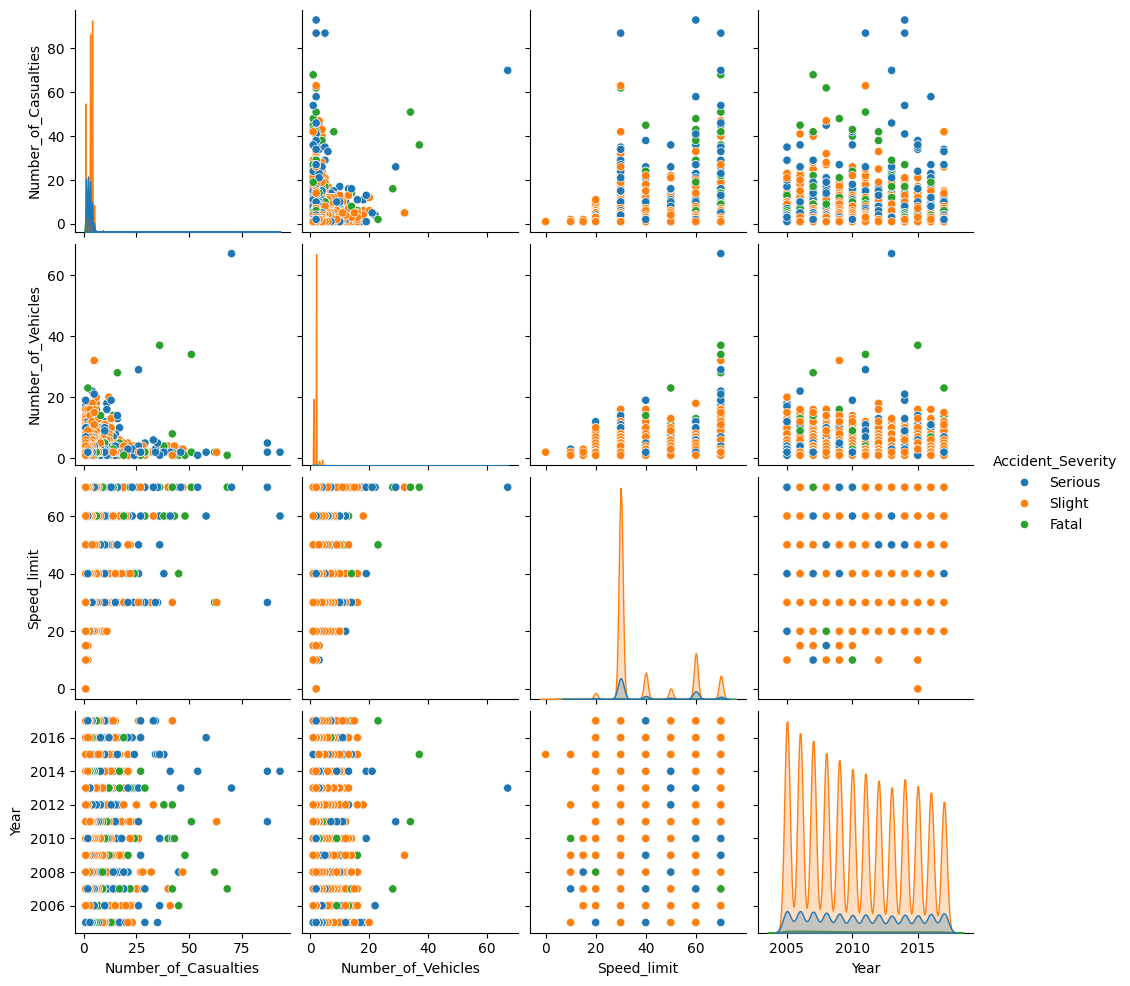

In [ ]:
if categorical_target_column:
  sns.pairplot( data=df , hue = target_column_name)

OBSERVATION

---
1. Fatal Accidents can happen doesn't have distinction when it comes to number of casualties and number of vehicles involved in the accidents. High Speed limit increases fatal accidents and serious accidents. Fatal Accidents with high casualty has incresed in recent years.
2. All slight accidents happen in low speed limit with low casualty and low vehicle involvments.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2047256 entries, 0 to 2047255
Data columns (total 11 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Accident_Severity        object 
 1   Day_of_Week              object 
 2   Light_Conditions         object 
 3   Number_of_Casualties     int64  
 4   Number_of_Vehicles       int64  
 5   Road_Surface_Conditions  object 
 6   Road_Type                object 
 7   Speed_limit              float64
 8   Urban_or_Rural_Area      object 
 9   Weather_Conditions       object 
 10  Year                     int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 171.8+ MB


<Axes: >

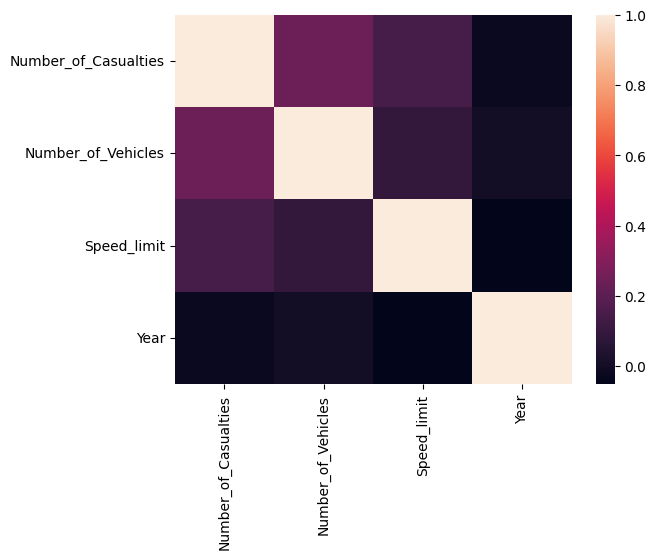

In [ ]:
#Correlation HeatMap for numeric columns among the dataset
sns.heatmap(df.corr( numeric_only =  True))

OBSERVATION

---
* **Strong Positive Correlations:** There is a strong positive correlation between Number_of_Casualties and Number_of_Vehicles. This means that accidents with more vehicles involved tend to have more casualties. There is also a positive correlation between Number_of_Vehicles and Speed_limit. This suggests that accidents on roads with higher speed limits tend to involve more vehicles.
* **Strong Negative Correlations:** There is a strong negative correlation between Speed_limit and Year. This means that newer roads tend to have lower speed limits.
* **Weaker Correlations:** The correlations between Number_of_Casualties and Year and between Number_of_Vehicles and Year are weaker and appear to be closer to zero. This suggests that there is no clear relationship between these features and the year of the accident.

In [ ]:
sampled_df = pd.DataFrame()

# Iterate over unique categories and sample 3% of each category
for category in df[target_column_name].unique():
    category_df = df[df[target_column_name] == category]
    sampled_category_df = category_df.sample(frac=0.1, random_state=42)
    sampled_df = pd.concat([sampled_df, sampled_category_df])

In [ ]:
# Accident_Severity
# Slight     1734548
# Serious     286339
# Fatal        26369

#Find out number of rows and columns
print(f'Total Number of Rows : {sampled_df.shape[0]}')
print(f'Total Number of Columns : {sampled_df.shape[1]}')
print(sampled_df[target_column_name].value_counts())

Total Number of Rows : 204726
Total Number of Columns : 11
Accident_Severity
Slight     173455
Serious     28634
Fatal        2637
Name: count, dtype: int64


Features and labels are stored in different variables. Categorical columns are encoded using OrdinalEncoder .

In [ ]:
X = sampled_df.drop(target_column_name , axis=1 )
y =  sampled_df[target_column_name]

enc = OrdinalEncoder()
X = enc.fit_transform( X )


le = LabelEncoder()
target_class = y.unique()
y = le.fit_transform( y )


In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       792
           1       0.00      0.00      0.00      8483
           2       0.85      1.00      0.92     52143

    accuracy                           0.85     61418
   macro avg       0.28      0.33      0.31     61418
weighted avg       0.72      0.85      0.78     61418



c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

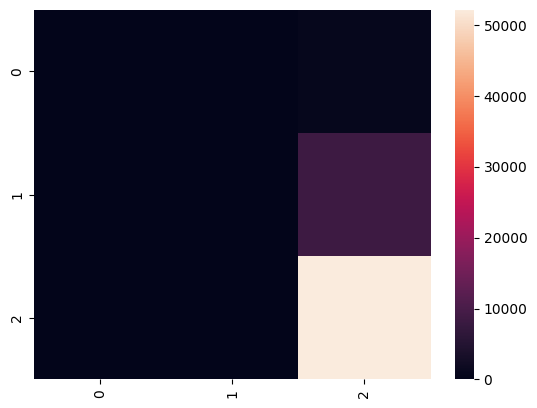

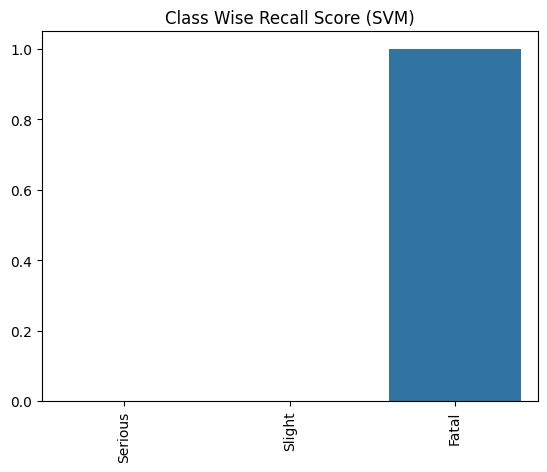

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


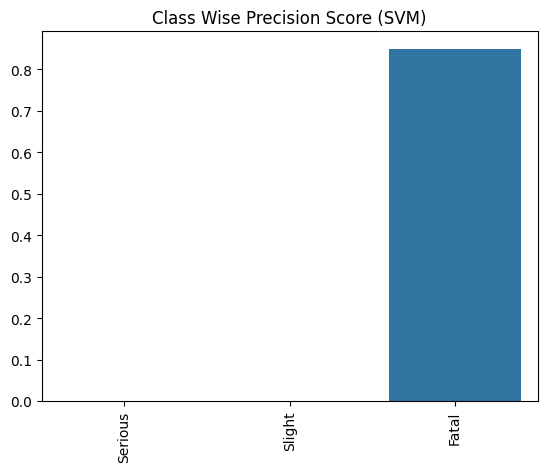

In [ ]:
if categorical_target_column:
  clf = SVC()
  clf.fit( X_train , y_train )
  y_pred = clf.predict( X_test )

  print( classification_report( y_test , y_pred ) )

  matrix = confusion_matrix( y_test , y_pred )
  sns.heatmap( matrix )
  plt.xticks(rotation=90)
  plt.show()

  sns.barplot( x = target_class ,y = recall_score( y_test , y_pred , average =  None) )
  plt.title( "Class Wise Recall Score (SVM)")
  plt.xticks(rotation=90)
  plt.show()

  sns.barplot( x = target_class ,y = precision_score( y_test , y_pred , average =  None) )
  plt.title( "Class Wise Precision Score (SVM)")
  plt.xticks(rotation=90)
  plt.show()

else:
  #apply linear regression . As shown in lab
  print("You Need to use Linear Regression as your target column in Numeric")

OBSERVATION

---


An analysis of the evaluation metrics reveals a significant discrepancy in recall scores between the three classes. Class "Serious" and "Slight" exhibits a recall of 0, while class "Fatal" demonstrates a substantially higher recall of 1.0. Precision for Class "Serious" and Class "Fatal" is 0.00, indicating that the model didn't correctly identify any instances of these classes. Precision for Class "Fatal" is 0.85, suggesting that when the model predicts Class "Fatal", it is correct 85% of the time. This disparity suggests that the model is underperforming in its ability to accurately identify instances belonging to class "Serious" and "Slight" Conversely, it demonstrates a greater proficiency in correctly classifying instances within class "Fatal".

In [ ]:
X = df.drop(target_column_name , axis=1 )
y =  df[target_column_name]

enc = OrdinalEncoder()
X = enc.fit_transform( X )


le = LabelEncoder()
target_class = y.unique()
y = le.fit_transform( y )

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

              precision    recall  f1-score   support

           0       0.06      0.02      0.03      7871
           1       0.20      0.05      0.08     85842
           2       0.85      0.96      0.90    520464

    accuracy                           0.82    614177
   macro avg       0.37      0.35      0.34    614177
weighted avg       0.75      0.82      0.78    614177



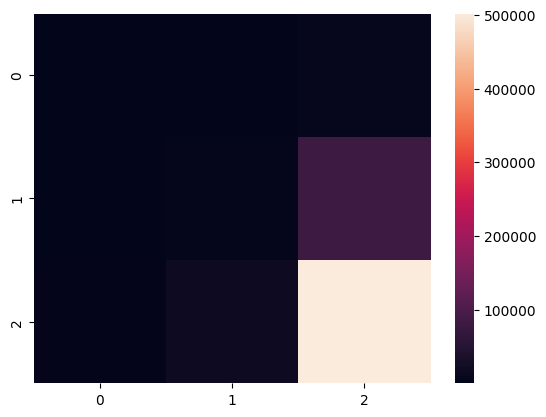

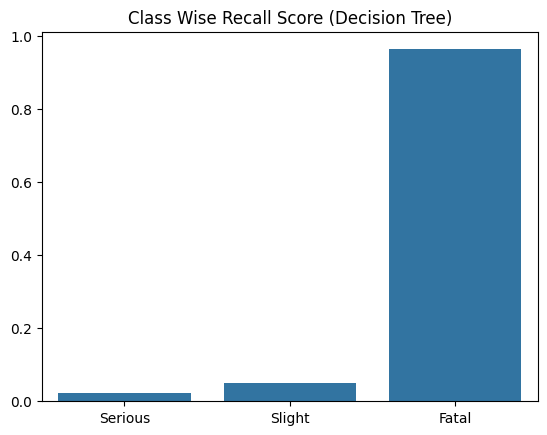

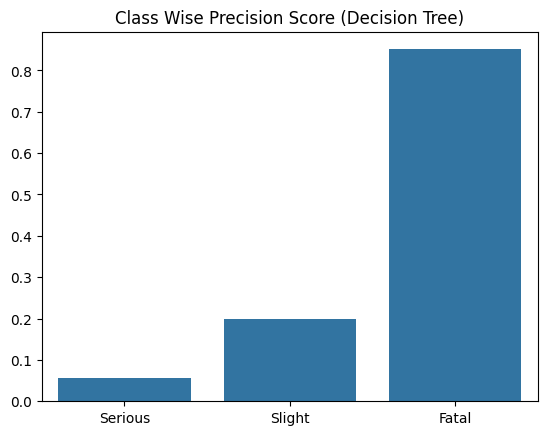

In [ ]:
if categorical_target_column:
  clf = tree.DecisionTreeClassifier()
  clf.fit( X_train , y_train )
  y_pred = clf.predict( X_test )

  print( classification_report( y_test , y_pred ) )

  matrix = confusion_matrix( y_test , y_pred )
  sns.heatmap( matrix )
  plt.show()

  sns.barplot( x = target_class ,y = recall_score( y_test , y_pred , average =  None) )
  plt.title( "Class Wise Recall Score (Decision Tree)")
  plt.show()

  sns.barplot( x = target_class ,y = precision_score( y_test , y_pred , average =  None) )
  plt.title( "Class Wise Precision Score (Decision Tree)")
  plt.show()

else:
  #apply linear regression . As shown in lab
  print("You Need to use Linear Regression as your target column in Numeric")

OBSERVATION

---

**For "Serious" (Class 0):**
Precision is low (0.06), indicating that out of all instances predicted as "Serious," only 6% were actually "Serious."
Recall is also low (0.02), meaning that the model identified only 2% of all actual instances of "Serious."
The F1-score is very low (0.03), reflecting a poor balance between precision and recall for "Serious."

**For "Slight" (Class 1):**
Precision is moderate (0.20), suggesting that when the model predicts "Slight," it is correct 20% of the time.
Recall is low (0.05), indicating that the model captured only 5% of all actual instances of "Slight."
The F1-score is also low (0.08), indicating a suboptimal balance between precision and recall for "Slight."

**For "Fatal" (Class 2):**
Precision is high (0.85), suggesting that when the model predicts "Fatal," it is correct 85% of the time.
Recall is very high (0.96), indicating that the model successfully identified 96% of all instances of "Fatal."
The F1-score is very high (0.90), suggesting a good balance between precision and recall for "Fatal."
The overall accuracy of the model is 82%, but the performance varies across different severity classes.

The results highlight challenges in predicting the "Serious" and "Slight" classes, indicating potential areas for improvement in the model or data preprocessing.
